# DOMAIN: Botanical research

**PROJECT OBJECTIVE:**

Company’s management requires an automation which can create a classifier capable of
determining a flower’s species from a photo

# IMPORT NECESSARY LIBRARIES

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

from keras.models import Model, Sequential
from keras import layers

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import VGG16

# PREPARE THE DATA SET

In [ ]:
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

The Files of Flowers was downloaded in the C Drive and used here

In [ ]:
import os
import shutil
import random

# original path to dataset
original_dataset_dir =r"C:\Users\hasun\Downloads\Power BI Beg to Adv\archive\flowers"

train_dir = os.path.join(base_dir, 'train') #Train set
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation') #Validation set
os.mkdir(validation_dir)

# class names
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

for cls in classes:
    cls_dir = os.path.join(original_dataset_dir, cls)
    files = os.listdir(cls_dir)
    random.shuffle(files)


    split_point = int(0.7 * len(files)) #Train 70% Validation 30%
    train_files = files[:split_point]
    validation_files = files[split_point:]

    train_cls_dir = os.path.join(train_dir, cls)
    os.makedirs(train_cls_dir)


    validation_cls_dir = os.path.join(validation_dir, cls)
    os.makedirs(validation_cls_dir)


    for file in train_files:
        src = os.path.join(cls_dir, file)
        dst = os.path.join(train_cls_dir, file)
        shutil.copyfile(src, dst)

    for file in validation_files:
        src = os.path.join(cls_dir, file)
        dst = os.path.join(validation_cls_dir, file)
        shutil.copyfile(src, dst)

**Prepare the data**

In [ ]:
training_dir=r"C:\Users\hasun\Downloads\Power BI Beg to Adv\Flowers\train"
validation_dir=r"C:\Users\hasun\Downloads\Power BI Beg to Adv\Flowers\validation"

def prep_data(augmented,batch_size=16):
    if augmented:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

        validation_datagen = ImageDataGenerator(rescale=1./255)

    else:
        train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
        validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # train set
    train_set = train_datagen.flow_from_directory(
        training_dir,
        target_size=(180, 180),
        seed=42,
        batch_size=batch_size,
        class_mode="sparse")


    # validation set
    validation_set = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(180, 180),
        seed=42,
        batch_size=batch_size,
        class_mode="sparse")

    return train_set , validation_set

**AUGUMENTATED DATA SET**

In [ ]:
augmented_train_set,validation_set=prep_data(True)

Found 3019 images belonging to 5 classes.
Found 1298 images belonging to 5 classes.


**TEST DATA SET**

In [ ]:
straight_test_set,validation_set=prep_data(False)

Found 3019 images belonging to 5 classes.
Found 1298 images belonging to 5 classes.


**Train and Validation split**

In [ ]:
import os
import matplotlib.pyplot as plt

train_dir = training_dir
validation_dir = validation_dir

train_class_counts = {}
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        train_class_counts[class_folder] = num_images

validation_class_counts = {}
for class_folder in os.listdir(validation_dir):
    class_path = os.path.join(validation_dir, class_folder)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        validation_class_counts[class_folder] = num_images

print("Training set Distribution:")
print(train_class_counts)

print("Validation set Distribution:")
print(validation_class_counts)

Training set Distribution:
{'daisy': 534, 'dandelion': 736, 'rose': 548, 'sunflower': 513, 'tulip': 688}
Validation set Distribution:
{'daisy': 230, 'dandelion': 316, 'rose': 236, 'sunflower': 220, 'tulip': 296}


**DISTRIBUTION OF DATASET ACROSS THE FLOWER CATEGORIES**

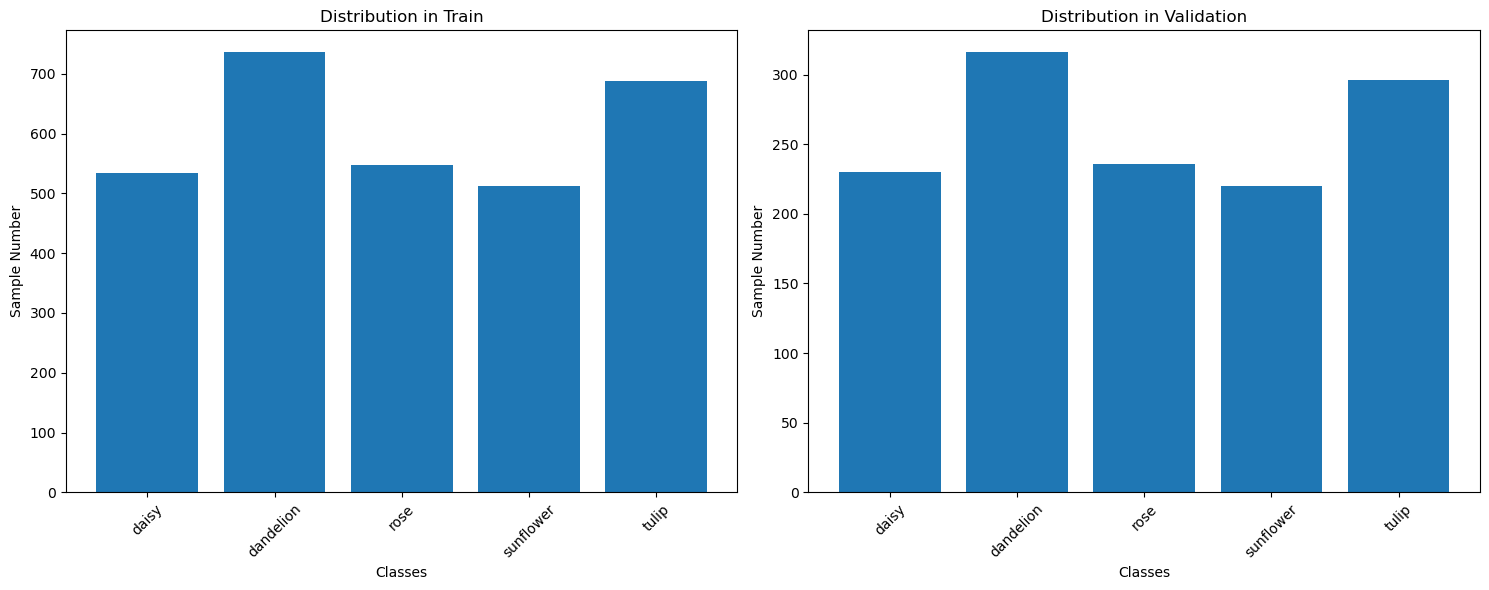

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.title('Distribution in Train')
plt.xlabel('Classes')
plt.ylabel('Sample Number')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(validation_class_counts.keys(), validation_class_counts.values())
plt.title('Distribution in Validation')
plt.xlabel('Classes')
plt.ylabel('Sample Number')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**SOME IMAGES FROM STRAIGHT DATA SET**

In [ ]:
images,labels=next(straight_train_set)

class_names = straight_train_set.class_indices
class_names = {v: k for k, v in class_names.items()}

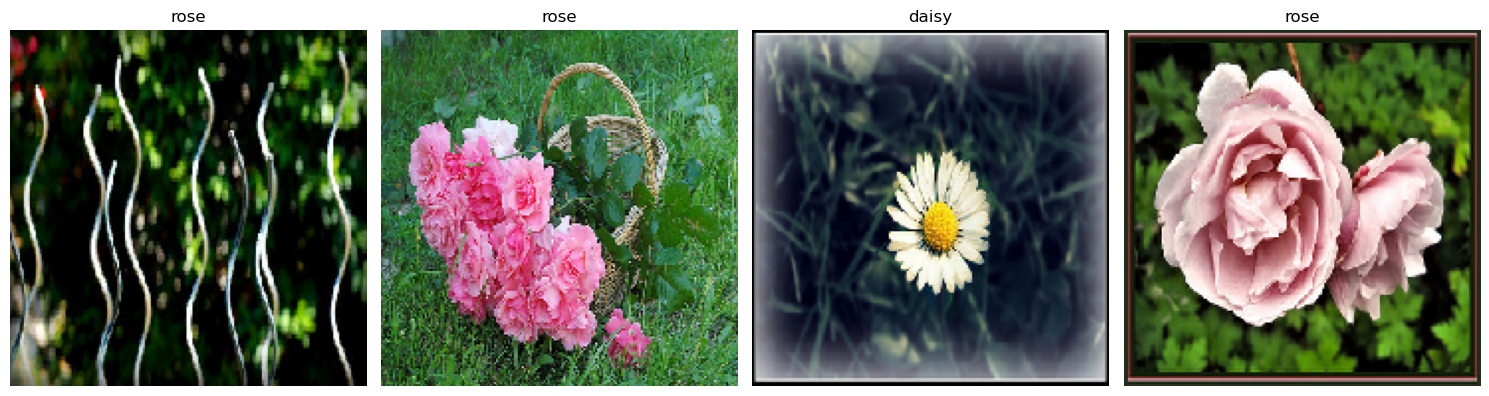

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axes[i].imshow(images[i])
    label_index = int(labels[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**AUGUMENTED TRAIN SET**

In [ ]:
images2,labels2=next(augmented_train_set)

class_names2 = augmented_train_set.class_indices
class_names2 = {v: k for k, v in class_names.items()}

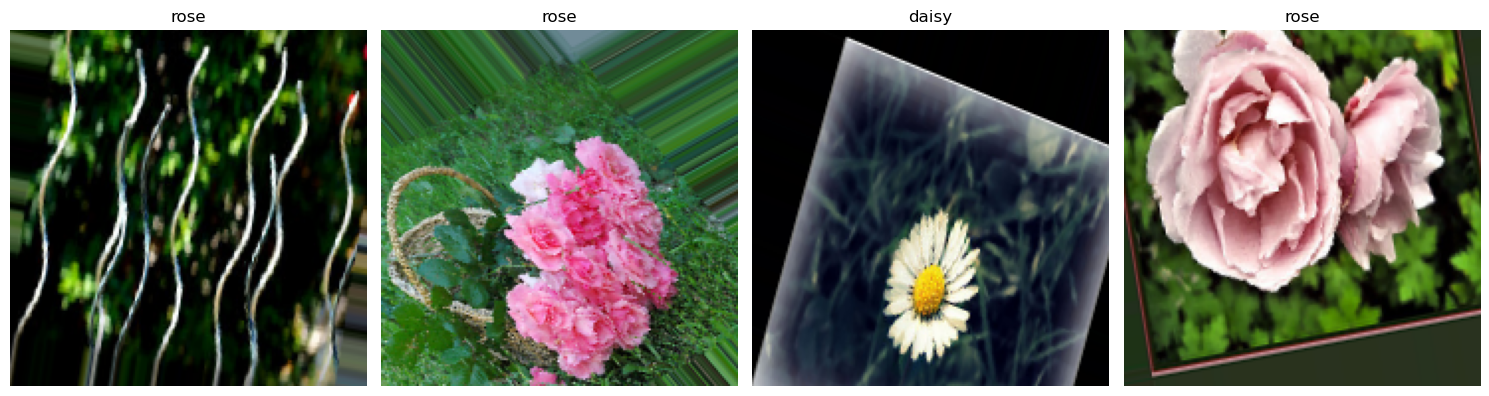

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    axes[i].imshow(images2[i])
    label_index = int(labels2[i])
    class_name = class_names[label_index]
    axes[i].set_title(f"{class_name}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# MODEL 1 - CNN - 4Conv2D layer

In [ ]:
train_set,validation_set=prep_data(False)

Found 3019 images belonging to 5 classes.
Found 1298 images belonging to 5 classes.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

C:\Users\hasun\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,654,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,784,773 (10.62 MB)

 Trainable params: 2,784,773 (10.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history1_1 = model.fit(
    train_set,
    epochs=20,
    validation_data=validation_set,)

Epoch 1/20


C:\Users\hasun\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


189/189 ━━━━━━━━━━━━━━━━━━━━ 45s 230ms/step - accuracy: 0.2959 - loss: 1.5670 - val_accuracy: 0.4376 - val_loss: 1.2877
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 29s 152ms/step - accuracy: 0.4368 - loss: 1.3276 - val_accuracy: 0.5408 - val_loss: 1.2066
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 29s 150ms/step - accuracy: 0.5018 - loss: 1.2490 - val_accuracy: 0.6040 - val_loss: 1.0676
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 29s 152ms/step - accuracy: 0.5187 - loss: 1.1803 - val_accuracy: 0.6171 - val_loss: 1.0221
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 29s 150ms/step - accuracy: 0.5802 - loss: 1.0897 - val_accuracy: 0.6186 - val_loss: 0.9778
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 29s 152ms/step - accuracy: 0.5906 - loss: 1.0543 - val_accuracy: 0.6163 - val_loss: 0.9916
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 29s 150ms/step - accuracy: 0.6190 - loss: 0.9757 - val_accuracy: 0.6764 - val_loss: 0.8735
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 29s 150ms/step - accuracy: 0.6683 - loss: 0.8977 - val

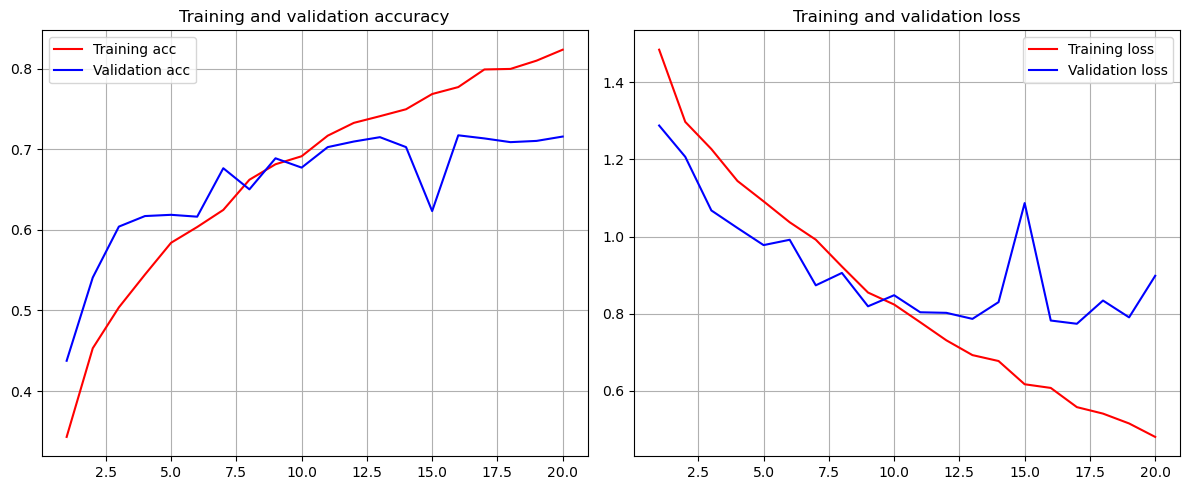

In [ ]:
visualize(history1_1)

**A Small Prediction with a image from internet**

In [ ]:
from keras.preprocessing import image
from keras.models import load_model

In [ ]:
img = image.load_img("SunFR.jpg", target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [ ]:
predictions = model2.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]
print(label_dict[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
sunflower


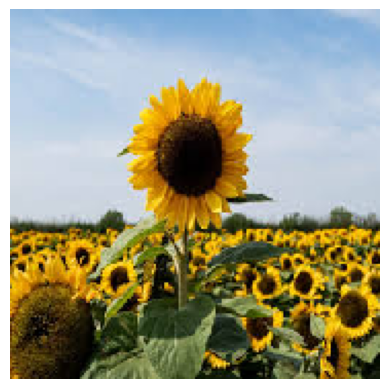

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_array[0])
plt.axis('off')
plt.show()

**The Accuracy of the model : 83%**
**The Val_Accuracy of the model : 71%**

# CNN Model with Data Augmentation

In [ ]:
train_set,validation_set=prep_data(True)

Found 3019 images belonging to 5 classes.
Found 1298 images belonging to 5 classes.


In [ ]:
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.Flatten())

model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(5, activation='softmax'))

model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 41, 41, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 18, 18, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,654,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,784,773 (10.62 MB)

 Trainable params: 2,784,773 (10.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history1_2 = model2.fit(
    train_set,
    epochs=25,
    validation_data=validation_set,)

Epoch 1/25


C:\Users\hasun\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 201ms/step - accuracy: 0.2838 - loss: 1.5216 - val_accuracy: 0.5108 - val_loss: 1.2420
Epoch 2/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 202ms/step - accuracy: 0.4386 - loss: 1.3115 - val_accuracy: 0.5455 - val_loss: 1.1556
Epoch 3/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 201ms/step - accuracy: 0.4817 - loss: 1.2559 - val_accuracy: 0.5794 - val_loss: 1.0894
Epoch 4/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 203ms/step - accuracy: 0.5264 - loss: 1.1728 - val_accuracy: 0.5616 - val_loss: 1.0899
Epoch 5/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 204ms/step - accuracy: 0.5213 - loss: 1.1447 - val_accuracy: 0.6202 - val_loss: 1.0168
Epoch 6/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 201ms/step - accuracy: 0.5613 - loss: 1.0909 - val_accuracy: 0.6233 - val_loss: 0.9736
Epoch 7/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 205ms/step - accuracy: 0.5920 - loss: 1.0310 - val_accuracy: 0.6718 - val_loss: 0.8886
Epoch 8/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 202ms/step - accuracy: 0.5834 - loss: 1.0501 - val

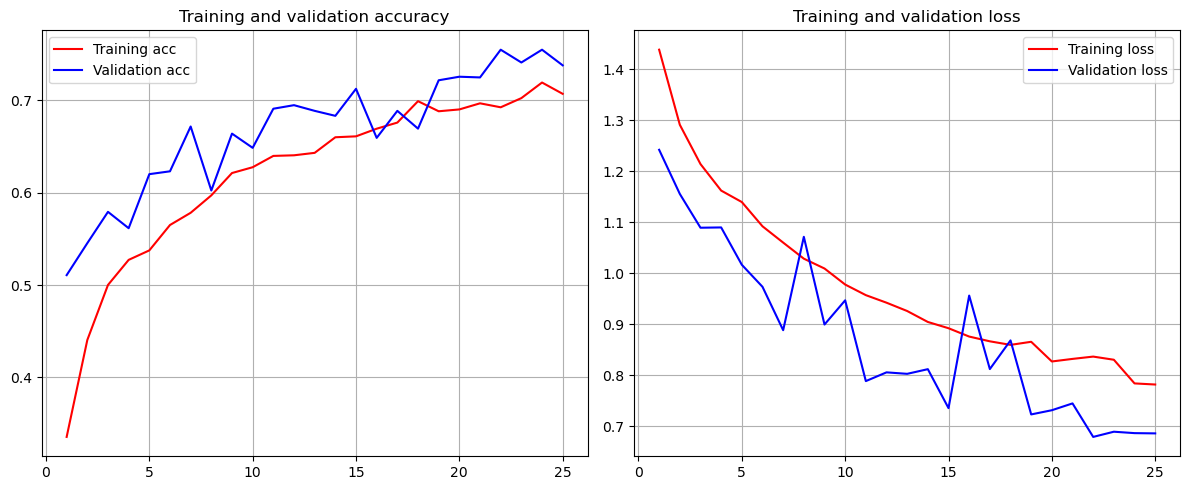

In [ ]:
visualize(history1_2)

**Prediction of a image provided from Internet**

In [ ]:
label_dict={0:'daisy',1: 'dandelion', 2:'rose', 3:'sunflower', 4:'tulip'}

In [ ]:
img = image.load_img("rose.jpg", target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [ ]:
predictions2 = model2.predict(img_array)
predicted_class = np.argmax(predictions2, axis=1)[0]
print(label_dict[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
rose


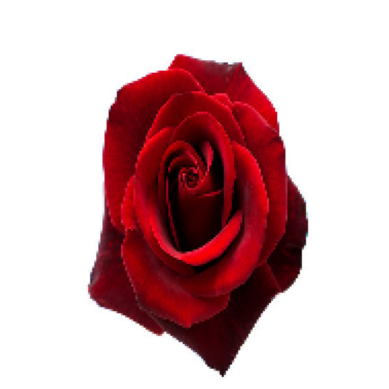

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_array[0])
plt.axis('off')
plt.show()

# TRANSFER LEARNING

# VGG16 Feature Extraction with Dropout - 0.4

In [ ]:
train_set,validation_set=prep_data(True)

Found 3019 images belonging to 5 classes.
Found 1298 images belonging to 5 classes.


In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [ ]:
for layer in conv_base.layers:
     layer.trainable = False

conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model3 = models.Sequential()
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dropout(0.4))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dropout(0.4))
model3.add(layers.Dense(5, activation='softmax'))

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history1_3 = model3.fit(
    train_set,
    epochs=40,
    validation_data=validation_set,)

Epoch 1/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 170s 888ms/step - accuracy: 0.3554 - loss: 1.5521 - val_accuracy: 0.7280 - val_loss: 0.8476
Epoch 2/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 169s 893ms/step - accuracy: 0.6158 - loss: 1.0467 - val_accuracy: 0.7296 - val_loss: 0.7772
Epoch 3/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 169s 887ms/step - accuracy: 0.6535 - loss: 0.9071 - val_accuracy: 0.7635 - val_loss: 0.6755
Epoch 4/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 169s 893ms/step - accuracy: 0.6856 - loss: 0.8511 - val_accuracy: 0.7735 - val_loss: 0.6378
Epoch 5/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 167s 881ms/step - accuracy: 0.7038 - loss: 0.7969 - val_accuracy: 0.7874 - val_loss: 0.5920
Epoch 6/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 168s 884ms/step - accuracy: 0.7248 - loss: 0.7602 - val_accuracy: 0.7812 - val_loss: 0.6045
Epoch 7/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 169s 892ms/step - accuracy: 0.7329 - loss: 0.7267 - val_accuracy: 0.7897 - val_loss: 0.5737
Epoch 8/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 169s 890ms/step - accuracy: 0.7322 -

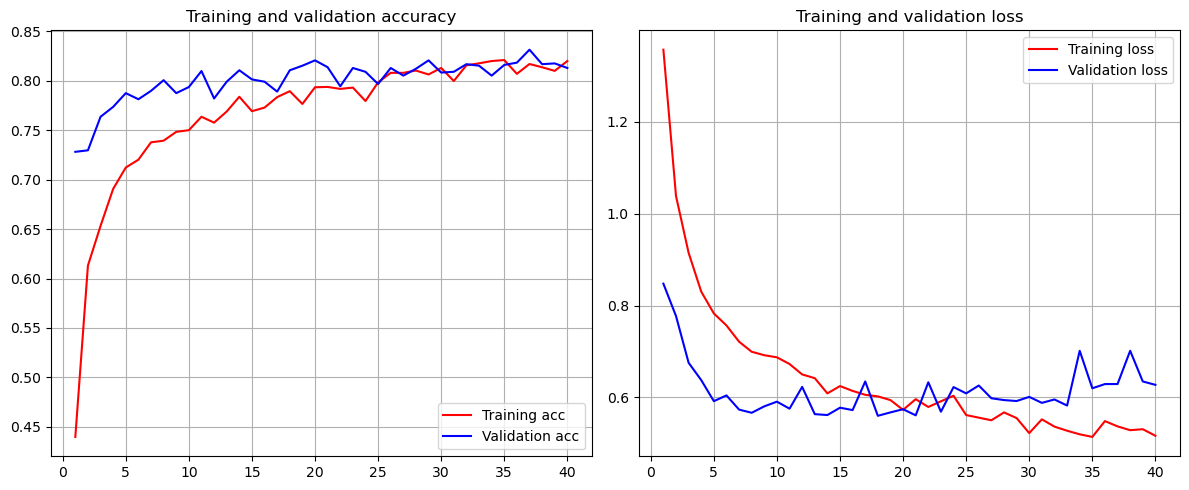

In [ ]:
visualize(history1_3)

**accuracy: 82.38% - val_accuracy: 81.28%**

**Prediction of an image from GImages**

In [ ]:
img = image.load_img("Amma.jpg", target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

In [ ]:
predictions3 = model3.predict(img_array)
predicted_class = np.argmax(predictions3, axis=1)[0]
print(label_dict[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
tulip


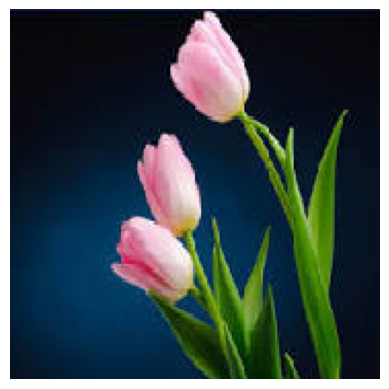

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_array[0])
plt.axis('off')
plt.show()

**Predictions with the Test Data**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


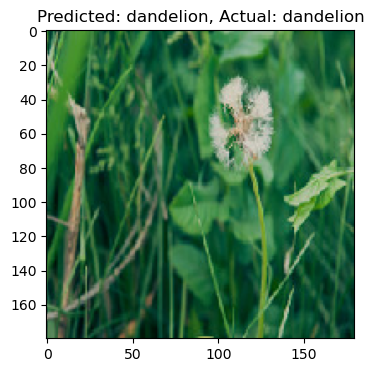

<Figure size 640x480 with 0 Axes>

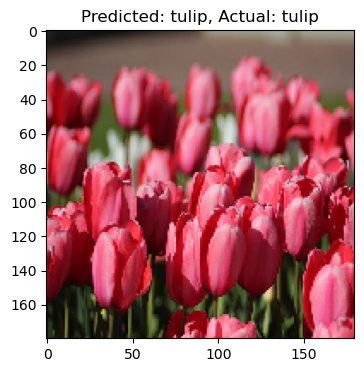

<Figure size 640x480 with 0 Axes>

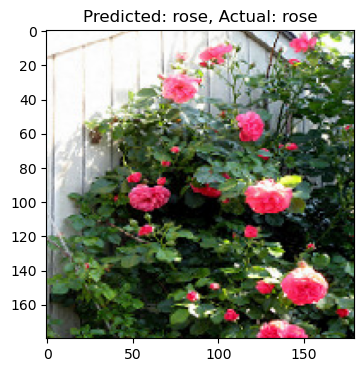

<Figure size 640x480 with 0 Axes>

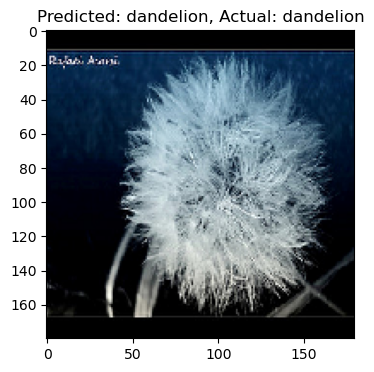

<Figure size 640x480 with 0 Axes>

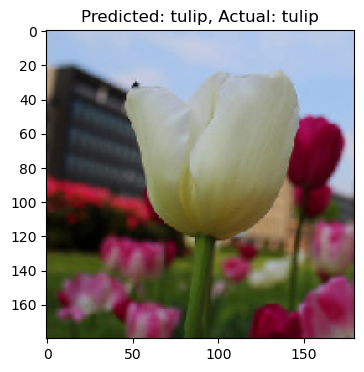

<Figure size 640x480 with 0 Axes>

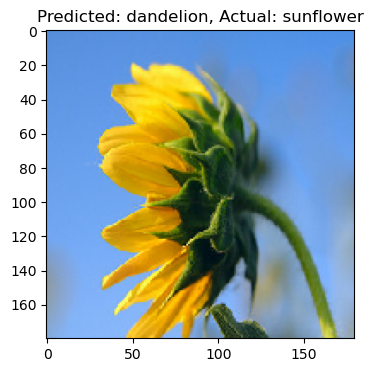

<Figure size 640x480 with 0 Axes>

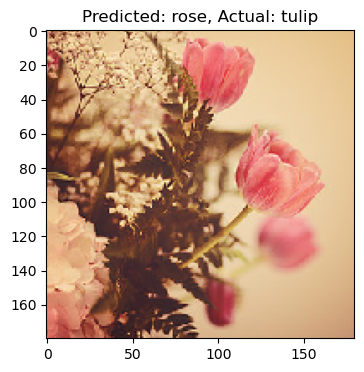

<Figure size 640x480 with 0 Axes>

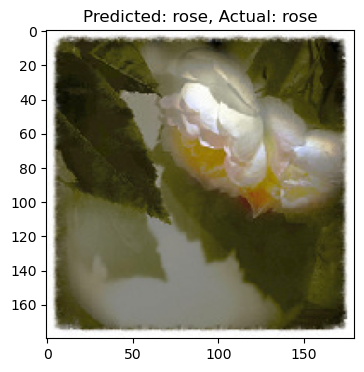

<Figure size 640x480 with 0 Axes>

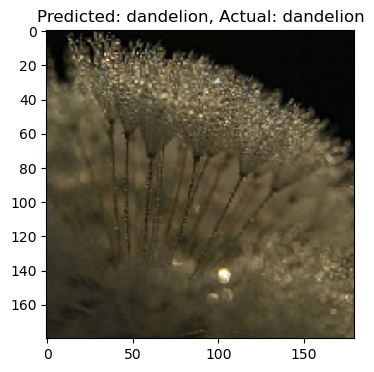

<Figure size 640x480 with 0 Axes>

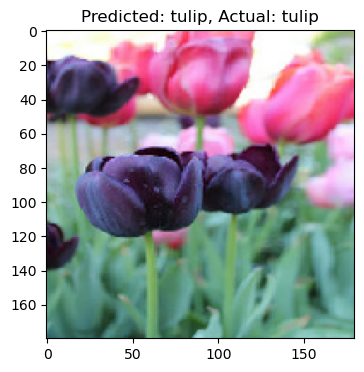

<Figure size 640x480 with 0 Axes>

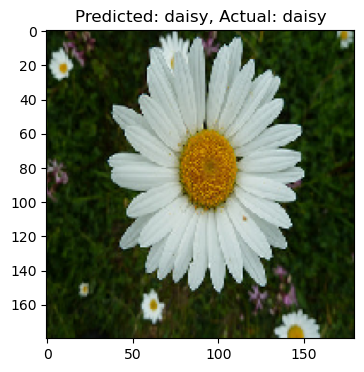

<Figure size 640x480 with 0 Axes>

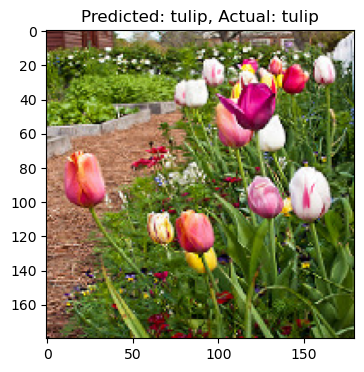

<Figure size 640x480 with 0 Axes>

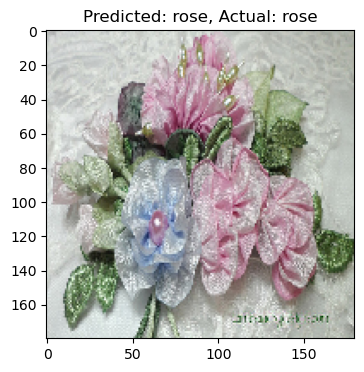

<Figure size 640x480 with 0 Axes>

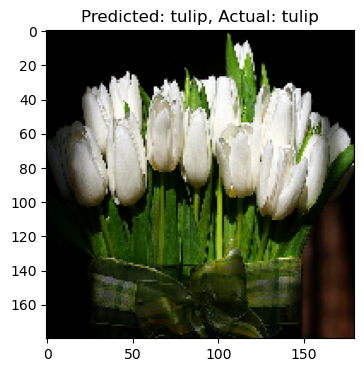

<Figure size 640x480 with 0 Axes>

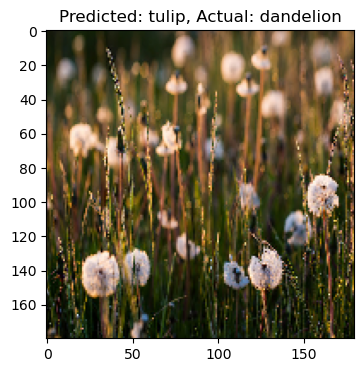

<Figure size 640x480 with 0 Axes>

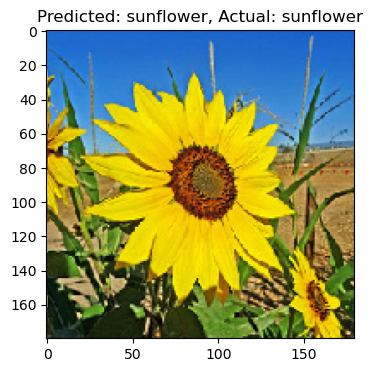

<Figure size 640x480 with 0 Axes>

In [ ]:
for batch_images, batch_labels in straight_test_set:

    batch_predictions = model3.predict(batch_images)
    predicted_classes = np.argmax(batch_predictions, axis=1)


    if len(batch_labels.shape) > 1 and batch_labels.shape[1] > 1:

        actual_classes = np.argmax(batch_labels, axis=1)
    else:

        actual_classes = batch_labels

    # Loop over images
    for i in range(len(batch_images)):
        # Rescale the images
        image = batch_images[i] * 255
        image = image.astype('uint8')
        plt.figure(figsize=(4,4))
        plt.imshow(image)
        plt.title(f"Predicted: {label_dict[predicted_classes[i]]}, Actual: {label_dict[actual_classes[i]]}")
        plt.show()
        plt.tight_layout()


    break